   sex  body weight  height  smoker  systolic blood preassure  \
0    2         42.4     146       0                       120   
1    1         73.0     181       0                       160   
2    1         83.9     175       0                       168   
3    1         77.0     172       1                       212   
4    1         78.0     171       0                       154   

   diastolic blood preassure  max systolic blood preassure  heart failure  \
0                         68                           220              1   
1                         82                           220              0   
2                         90                           245              0   
3                        114                           250              1   
4                         94                           210              0   

   HYPERTENSION(1,0)  
0                  0  
1                  0  
2                  1  
3                  0  
4                  1  
RBF Rand

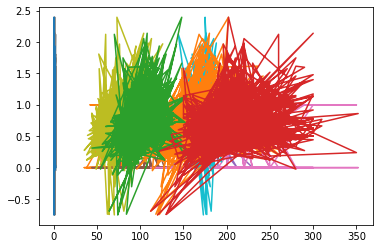

In [2]:
from time import time
from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from sklearn.cluster import k_means
from sklearn.metrics import f1_score,precision_recall_fscore_support, confusion_matrix as score, accuracy_score
import numpy as np
import pandas as pd
from elmclassify import ELMClassifier, ELMRegressor, GenELMClassifier, GenELMRegressor
from random_layer import RandomLayer, MLPRandomLayer, RBFRandomLayer, GRBFRandomLayer
from math import sqrt
import csv
import matplotlib.pyplot as plt


#import plotly.tools as tls
from sklearn.preprocessing import StandardScaler

pdf = pd.read_csv('hype.csv')
print(pdf.head())

#x = np.arange(0.25, 20, 0.1)
x = pdf[['sex','body weight','height','smoker','systolic blood preassure','diastolic blood preassure','max systolic blood preassure']]#,'heart failure']]
y = pdf[['HYPERTENSION(1,0)']]
#print(x.head())
#print(y.head())


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)



elmc = ELMClassifier(n_hidden=500, activation_func='multiquadric')



elmr = ELMRegressor(random_state=0, activation_func='gaussian', alpha=0.0)
elmr.fit(x, y)
print
elmr.score(x, y), elmr.score(x, y)
plot(x, y, x, elmr.predict(x))




#rhl = RandomLayer(n_hidden=1000, alpha=1.0)
rhl = RBFRandomLayer(n_hidden=500, rbf_width=0.0001)
elmr = GenELMClassifier(hidden_layer=rhl)
elmr.fit(x_train, y_train)
predicted = elmr.predict(x_test)
#precision, recall, fscore, support = score(y_test, predicted)

print("RBF Random")


nh = 20
(ctrs, _, _) = k_means(x_train, nh)
unit_rs = np.ones(nh)

rhl = GRBFRandomLayer(n_hidden=nh, grbf_lambda=.0001, centers=ctrs)
elmr = GenELMClassifier(hidden_layer=rhl)
elmr.fit(x_train, y_train)
#Y_pred = elmr.predict(x_test)
print("MELM GRBF" ,elmr.score(x_train, y_train), elmr.score(x_test, y_test))
print("MELM GRBF confusion", elmr.confusion(x_test, y_test))

rbf_rhl = RBFRandomLayer(n_hidden=100, random_state=0, rbf_width=0.0001)
elmc_rbf = GenELMClassifier(hidden_layer=rbf_rhl)
elmc_rbf.fit(x_train, y_train)
y_pred_rbf = elmr.predict(x_test)

print('RBF GenELM Classifier',elmc_rbf.score(x_train, y_train), elmc_rbf.score(x_test, y_test))


def powtanh_xfer(activations, power=1.0):
    return pow(np.tanh(activations), power)


tanh_rhl = MLPRandomLayer(n_hidden=500, activation_func=powtanh_xfer, activation_args={'power': 3.0})
elmc_tanh = GenELMClassifier(hidden_layer=tanh_rhl)
elmc_tanh.fit(x_train, y_train)

import pickle
pickle.dump(elmc,open('random.pkl','wb'))


